## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data/kc_house_data.csv')

# Display basic information about the dataset
print(df.info())

# Summary statistics of numeric columns
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [2]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [3]:
# List of columns to drop
columns_to_drop = ['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 
                   'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,Average,8 Good,2004


In [4]:
df.dropna(inplace=True)  # Remove rows with missing values

# Data Type Conversion
df['waterfront'] = df['waterfront'].map({'NO': False, 'YES': True})  # Convert 'waterfront' to boolean
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1,6414100192,538000.0,3,2.25,2570,7242,2.0,False,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,False,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,False,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,False,Average,8 Good,1987
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,False,Average,11 Excellent,2001
...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,False,Average,8 Good,2008
21592,263000018,360000.0,3,2.50,1530,1131,3.0,False,Average,8 Good,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,False,Average,8 Good,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,False,Average,7 Average,2009


In [5]:
# Fill missing values in the 'waterfront' column with 'NO'
df['waterfront'].fillna('NO', inplace=True)
df['waterfront'] = df['waterfront'].map({'NO': False, 'YES': True})
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NaN,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NaN,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NaN,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NaN,Average,8 Good,1987
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,NaN,Average,11 Excellent,2001
...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,NaN,Average,8 Good,2008
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NaN,Average,8 Good,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NaN,Average,8 Good,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NaN,Average,7 Average,2009


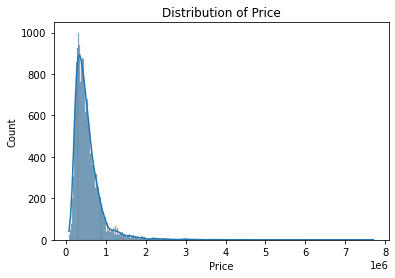

In [6]:
# Visualize the distribution of the target variable 'price'
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select predictor variables and target variable
X = df[['sqft_living', 'bedrooms']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a basic linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error: 63918912735.273705
R-squared (R2) Score: 0.501821231598041


In [8]:

# For this example, we'll use 'sqft_living', 'bedrooms', 'bathrooms', 'floors', and 'yr_built' as predictors.
X = df[['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'yr_built']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Multiple Linear Regression Results:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

# Print the model coefficients
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
print("\nModel Coefficients:")
print(coefficients)



Multiple Linear Regression Results:
Mean Squared Error (MSE): 57345142912.0016
R-squared (R2) Score: 0.5530566549519869

Model Coefficients:
      Variable   Coefficient
0  sqft_living    300.504990
1     bedrooms -67456.744538
2    bathrooms  73525.544227
3       floors  56834.452898
4     yr_built  -3420.500860


Based on the model's coefficients, real estate professionals may consider emphasizing the importance of living space ('sqft_living') and bathrooms ('bathrooms') when marketing properties. Additionally, understanding the impact of the number of bedrooms ('bedrooms') and the year built ('yr_built') can help in pricing strategies.

Stakeholder: Real Estate Agency

Business Problem:
The real estate agency aims to optimize property pricing strategies to maximize profitability and client satisfaction. They are looking to leverage data-driven insights to address the following business problem:

Business Problem Statement:
"How can the real estate agency develop an accurate and competitive pricing strategy for residential properties in the Seattle area, ensuring that properties are priced optimally to attract buyers while maximizing revenue for sellers?"